# Using the Twitter API

In [63]:
import pickle
import os
import twitter
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from palettable.colorbrewer.qualitative import Dark2_8

Check for credentials saved locally in a pickle file, if not found create one by inputting credentials

In [2]:
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = ''
    Twitter['Consumer Secret'] = ''
    Twitter['Access Token'] = ''
    Twitter['Access Token Secret'] = ''
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

Authorize the application to access Twitter account information

In [3]:
auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

twitter_api = twitter.Twitter(auth=auth)

Twitter utilizes the where on earth ID (WOEID) to geographically tag tweets. WOEID lookup found [here](http://www.woeidlookup.com/).

In [4]:
#Use ID to limit scope of queries
US_ID = 23424977

#See what is trending in the US
us_trends = twitter_api.trends.place(_id=US_ID)
trends_set = set([trend['name'] for trend in us_trends[0]['trends']])
trends_set

{'#1linewed',
 '#BenisekvLamone',
 '#BestSchoolDay',
 '#BetterYourselfIn3Words',
 '#BoSTEM',
 '#BootPruitt',
 '#BurnTheStageIsComing',
 '#CFAFPC',
 '#CelebrateWomen',
 '#CutFromTheStormyInterview',
 '#DDV18',
 '#DawsonsCreek',
 '#DonaldSmith',
 '#HealthyReturns',
 '#IBelieveHer',
 '#KTUphoria',
 '#MakeAnInsultShakespearean',
 '#ManateeAppreciationDay',
 '#MorningJoe',
 '#MyDayImprovesWhen',
 '#NYIAS',
 '#SPFestDC',
 '#Suits',
 '#SynapseSummit',
 '#ThoughtsWhileScrollingTwitter',
 '#TurnAroundDontDrown',
 '#WednesdayWisdom',
 '#WomenOnTheRise',
 '#bilibilicheers',
 '#help1family',
 '#umecs18',
 'Abdalá Bucaram',
 'All 22',
 'Aviator',
 'Corey Feldman',
 'Cosmopolitan',
 'Dragon Quest XI',
 'Federal Government',
 'Gary Owen',
 'Hannah Glasse',
 'Happy 3-28',
 'Happy Opening Day Eve',
 'Hump Day',
 'Nike Air Max 97',
 'Prisoners Hang in the Balance',
 'Rick Gates',
 'Robert Mercer',
 'Southern Baptist',
 'Teachers Lose Grants',
 'Virginia Woolf'}

Pick a random trend and look at them.
Documentation for search API found [here](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets).

In [90]:
#Pick random trend
queries = list(np.random.choice(list(trends_set), 1, replace = False))

#Pick number of queries to return
number = 1000
search_results = twitter_api.search.tweets(q=queries, count=number, lang='en')
statuses = search_results['statuses']

#Print a list of keys found within results
print('Random trend: \n' + str(queries))
print('Response keys using search API: \n' + str(list(statuses[0].keys())))

Random trend: 
['#ManateeAppreciationDay']
Response keys using search API: 
['retweeted_status', 'in_reply_to_status_id_str', 'source', 'text', 'lang', 'retweeted', 'id_str', 'extended_entities', 'favorite_count', 'entities', 'in_reply_to_user_id', 'in_reply_to_screen_name', 'metadata', 'user', 'favorited', 'in_reply_to_user_id_str', 'retweet_count', 'coordinates', 'id', 'created_at', 'contributors', 'geo', 'in_reply_to_status_id', 'truncated', 'is_quote_status', 'possibly_sensitive', 'place']


Retrive the status text and hashtags of each tweet

In [91]:
#Retrieve status
status_texts = [status['text'] for status in statuses]

#Retrive hashtags
hashtags = [hashtag['text'] for status in statuses
                 for hashtag in status['entities']['hashtags']]

#Split each word in status text into a list
words = [word.lower() for text in status_texts 
              for word in text.split()]

Create a formatted table that shows frequency of words and hashtags

In [98]:
#Function to create a table
def prettyprint_counts(label, list_of_tuples):
    print("\n{:^20} | {:^6}".format(label, "Count"))
    print("*"*40)
    for k,v in list_of_tuples:
        print("{:20} | {:>6}".format(k,v))

#Create a table from words and hashtags
for label, data in (('Word', words), 
                    ('Hashtag', hashtags)):  
    c = Counter(data)
    prettyprint_counts(label, c.most_common()[:10])


        Word         | Count 
****************************************
rt                   |     81
to                   |     80
you                  |     44
a                    |     40
manatees             |     32
#manateeappreciationday! |     30
are                  |     29
know                 |     29
these                |     28
#manateeappreciationday |     28

      Hashtag        | Count 
****************************************
ManateeAppreciationDay |     71
NationalManateeAppreciationDay |      4
manatee              |      3
Manatees             |      2
gifts                |      2
marine               |      1
LoveFL               |      1
oceans               |      1
WildlifeWednesday    |      1
Florida              |      1


Remove stopwords, @'s and RT's to get a better idea of what is being tweeted

In [93]:
#Create set of stopwords from wordcloud package
stopwords = set(STOPWORDS)

#Create filtered list of words 
filtered_words = [word for word in words if word.lower() not in stopwords
                 and not word.startswith('@')
                 and not word.startswith('https')
                 and word != 'RT']

#Create formatted chart to return most common words and hashtags
for label, data in (('Word', filtered_words), 
                    ('Hashtag', hashtags)):  
    c = Counter(data)
    prettyprint_counts(label, c.most_common()[:10])


        Word         | Count 
****************************************
rt                   |     81
manatees             |     32
#manateeappreciationday! |     30
know                 |     29
#manateeappreciationday |     28
happy                |     28
sea                  |     27
help                 |     22
manatee              |     15
healthy              |     15

      Hashtag        | Count 
****************************************
ManateeAppreciationDay |     71
NationalManateeAppreciationDay |      4
manatee              |      3
Manatees             |      2
gifts                |      2
marine               |      1
LoveFL               |      1
oceans               |      1
WildlifeWednesday    |      1
Florida              |      1


Create a wordcloud to visualize the frequency distribution using a custom mask of the Twitter logo

In [94]:
#Select a font
font_path = 'C:/Windows/Fonts/AmaticSC-Bold.ttf'

#Read in the twitter png
icon_path = 'C:/Users/Josh/Desktop/Python for Data Science/WordCloud/twitter_mask.png'
icon = Image.open(icon_path)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

#Generate wordcloud from tweets
wc = WordCloud(font_path = font_path, width=1800, height=1400,max_words=int(len(filtered_words)/4), mask=mask, 
               background_color='black', max_font_size=300).generate(' '.join(filtered_words))

#Create a recoloring function and recolor the image
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

wc.recolor(color_func=color_func)

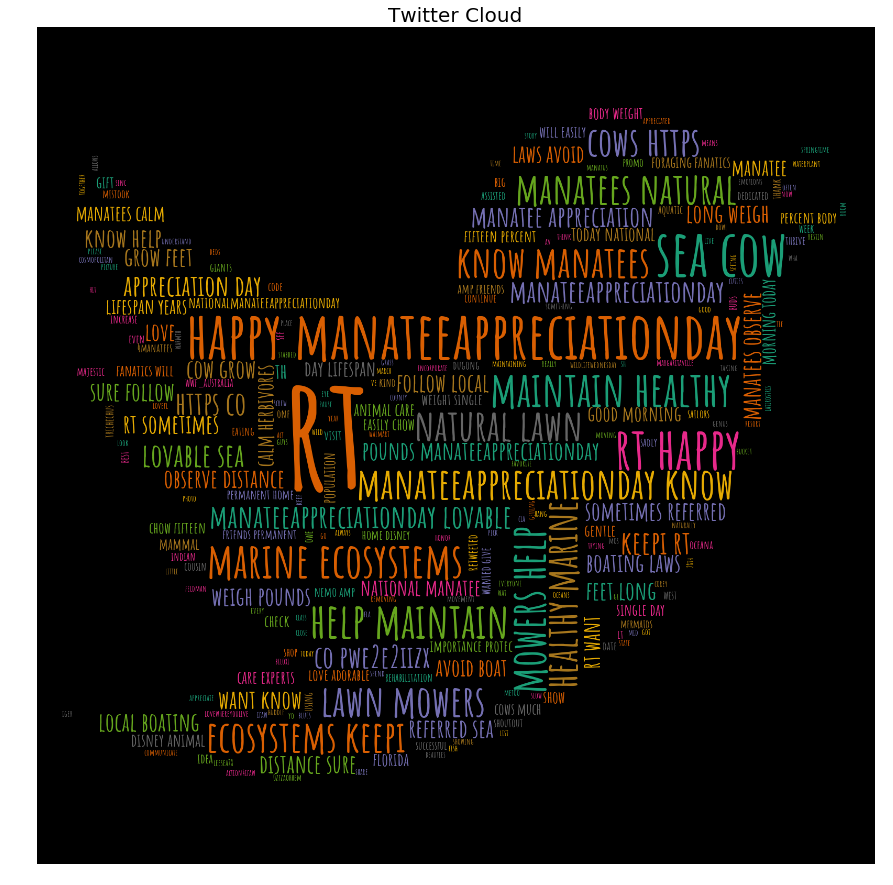

In [95]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title("Twitter Cloud", fontsize=20)
plt.imshow(wc)
plt.axis("off")
plt.show()